## 实现模糊熵

### 0. 加载python库

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import lfilter, medfilt

### 1. 定义模糊熵函数

In [6]:
def FuzzyEntopy(x, m, r=0.15, n=2):
    x = np.array(x)
    if x.ndim != 1:
        raise ValueError("x的维度不是一维")
    if len(x) < m + 1:
        raise ValueError("len(x)小于m+1")  
    entropy = 0
    
    for temp in range(2):  # 5.	将窗 m 增长为 m+1: temp = 0：m ； temp = 1: m+1
        # 2. 以m为窗，将时间序列分为k = n-m+1个序列
        X = []
        for i in range(len(x) + 1 - (m  + temp)):
            X.append(x[i:i+m+temp])
        X = np.array(X)
        D_value = []
        # 3. 计算绝对距离
        for index1, i in enumerate(X):
            d = []
            for index2, j in enumerate(X):
                if index1 != index2:
                    d.append(np.max(np.abs(i-j)))
            D_value.append(d)
        # 4. 计算模糊隶属度D
        D = np.exp(-np.power(D_value, n)/r)
        Lm = np.average(D.ravel())
        # 6. 计算模糊熵
        entropy = np.abs(entropy) - np.log(Lm)
    return entropy

### 2. 模糊熵的应用

#### 2.1 简单的示例信号，用于理解模糊熵的原理

x的模糊熵： 4.794095138539894
x的模糊熵： 13.756173310525991


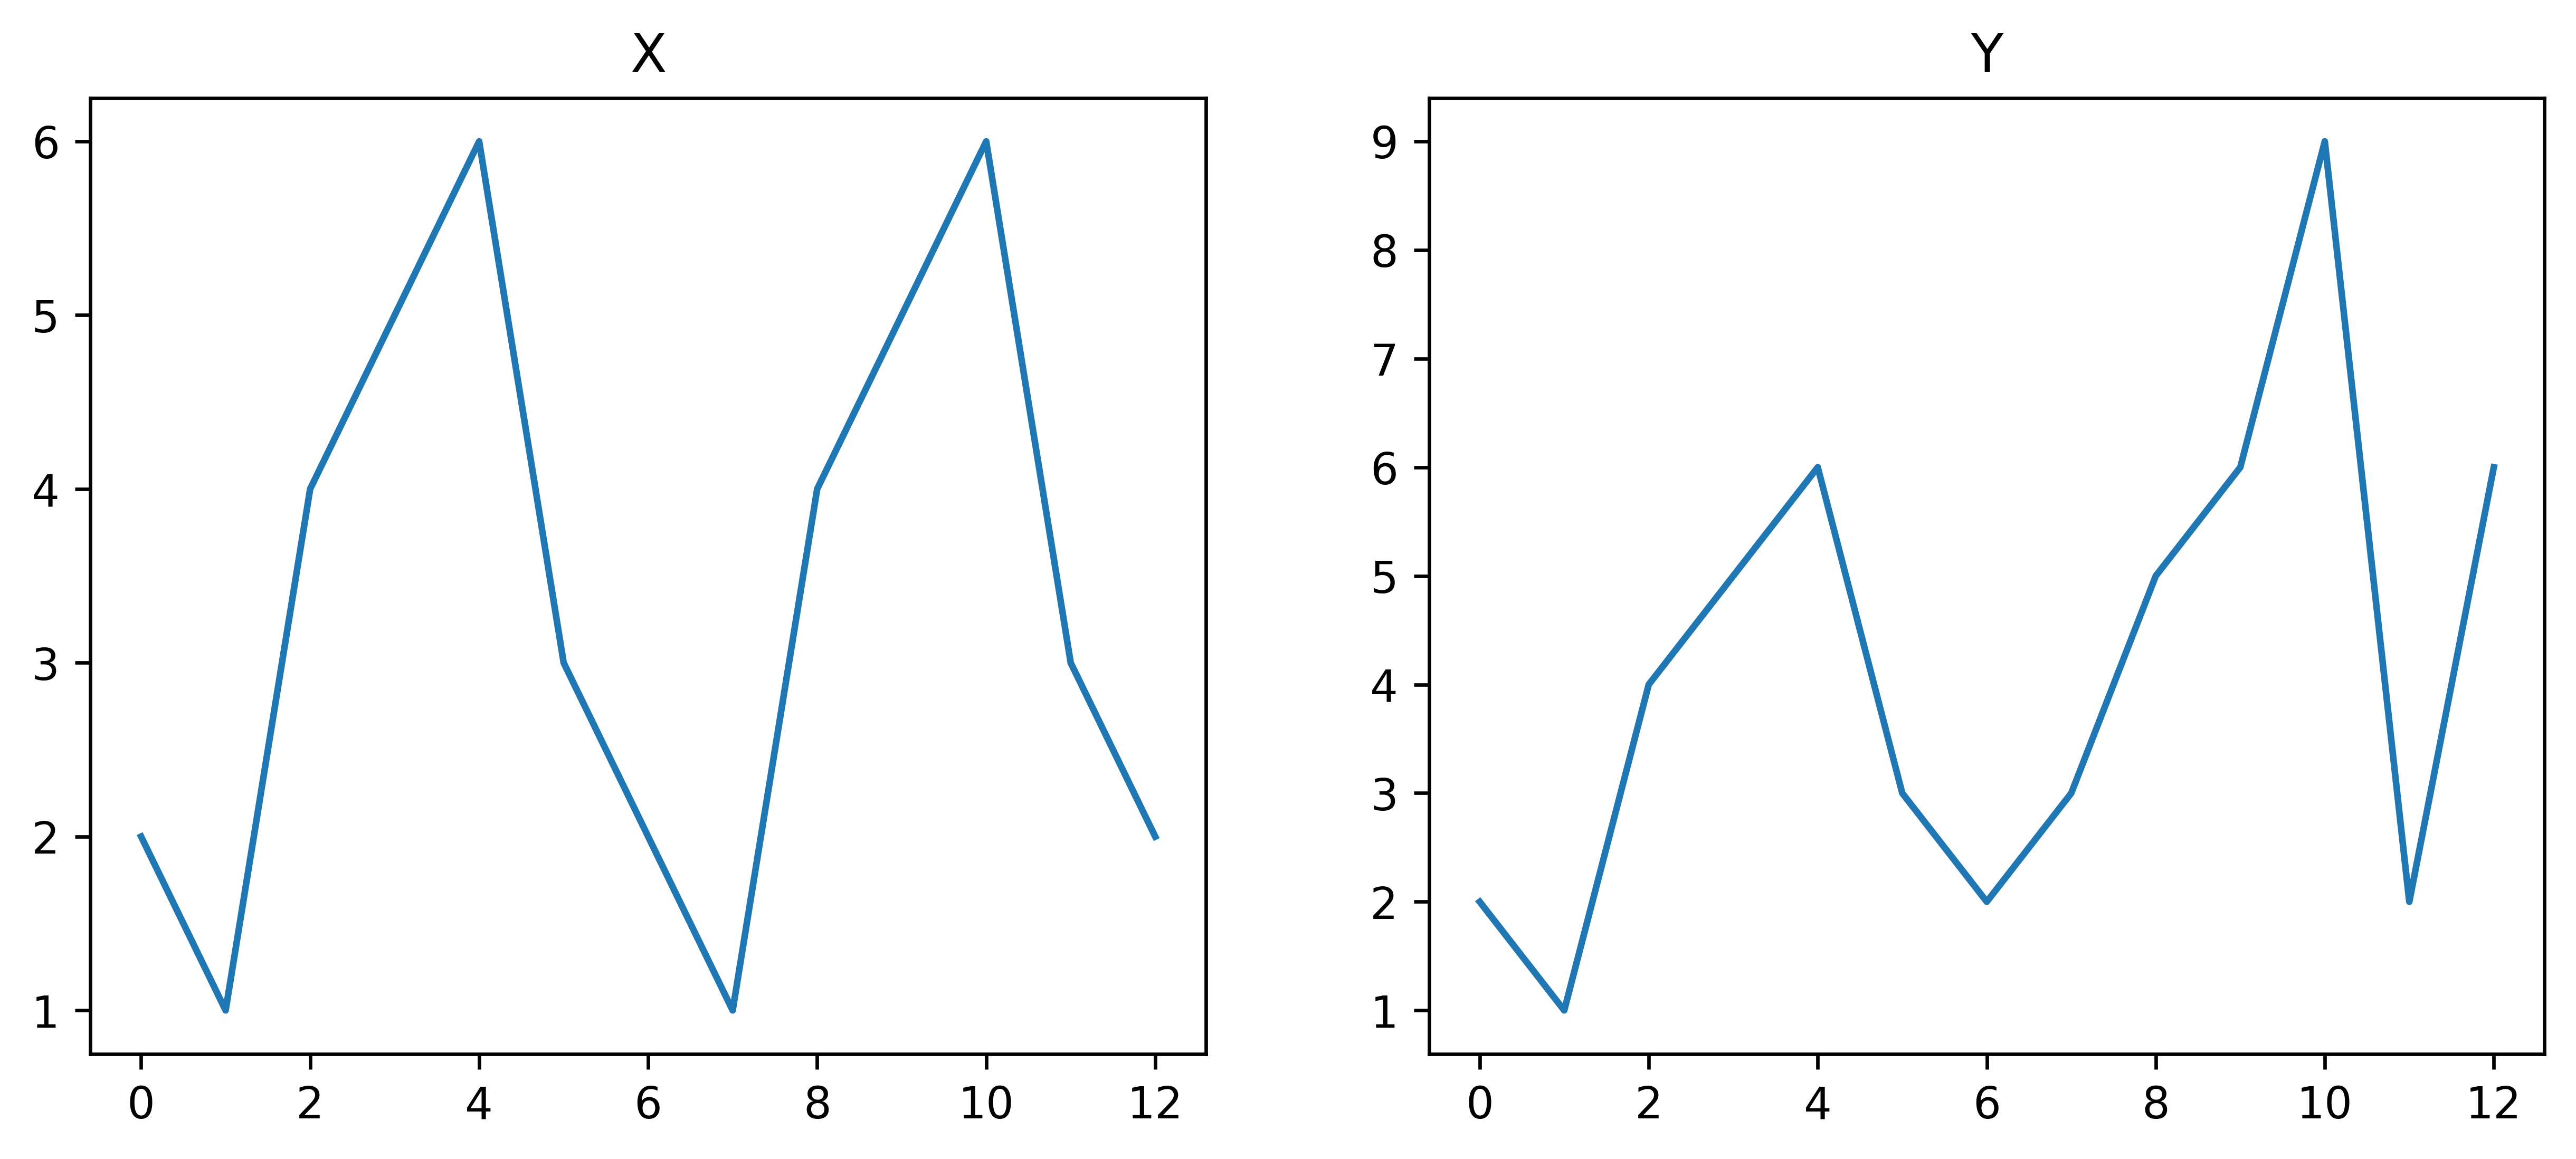

In [7]:
x = [2,1,4,5,6,3,2,1,4,5,6,3,2]    # x 规律
y = [2,1,4,5,6,3,2,3,5,6,9,2,6]    # y 不规律
plt.figure(figsize=(10,4), dpi=600)
plt.subplot(1,2,1)
plt.plot(x)
plt.title('X')
plt.subplot(1,2,2)
plt.plot(y)
plt.title('Y')

Xstd = np.std(x)
fuEnX = FuzzyEntopy(x, 2)
print('x的模糊熵：', fuEnX)

Ystd = np.std(y)
fuEnY = FuzzyEntopy(y, 2)
print('x的模糊熵：', fuEnY)